In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import shutil

In [5]:
train_EOSINOPHIL = os.path.join (r"/kaggle/input/wbcdataset/images/TRAIN/EOSINOPHIL")

train_LYMPHOCYTE = os.path.join (r"/kaggle/input/wbcdataset/images/TRAIN/LYMPHOCYTE")

train_MONOCYTE = os.path.join (r"/kaggle/input/wbcdataset/images/TRAIN/MONOCYTE")

train_NEUTROPHIL = os.path.join (r"/kaggle/input/wbcdataset/images/TRAIN/NEUTROPHIL")

In [7]:
test_EOSINOPHIL = os.path.join (r"/kaggle/input/wbcdataset/images/TEST/EOSINOPHIL")

test_LYMPHOCYTE = os.path.join (r"/kaggle/input/wbcdataset/images/TEST/LYMPHOCYTE")

test_MONOCYTE = os.path.join (r"/kaggle/input/wbcdataset/images/TEST/MONOCYTE")

test_NEUTROPHIL = os.path.join (r"/kaggle/input/wbcdataset/images/TEST/NEUTROPHIL")

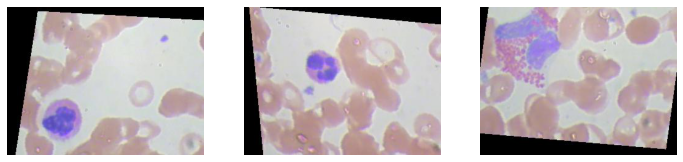

In [5]:
eosinophil_img = [os.path.join(train_EOSINOPHIL, file)
              for file in os.listdir(train_EOSINOPHIL)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(eosinophil_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

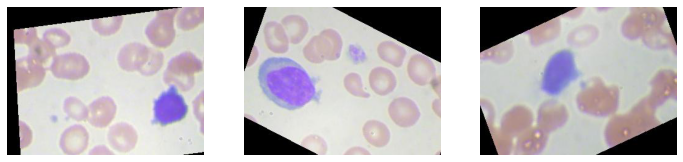

In [6]:
lymphocyte_img = [os.path.join(train_LYMPHOCYTE, file)
              for file in os.listdir(train_LYMPHOCYTE)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(lymphocyte_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

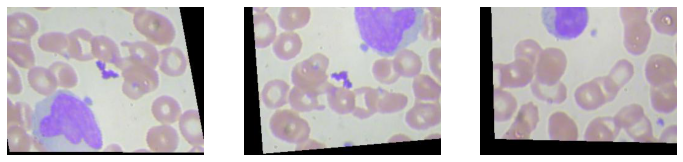

In [7]:
monocyte_img = [os.path.join(train_MONOCYTE, file)
              for file in os.listdir(train_MONOCYTE)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(monocyte_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

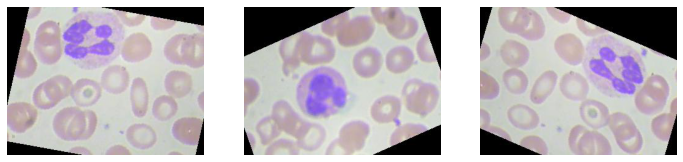

In [8]:
neutrophil_img = [os.path.join(train_NEUTROPHIL, file)
              for file in os.listdir(train_NEUTROPHIL)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(neutrophil_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

***

In [6]:
datagen = ImageDataGenerator()

In [7]:
batch_size = 64
img_height = 128
img_width = 128

In [8]:
train_generator = datagen.flow_from_directory(
    directory=r"/kaggle/input/wbcdataset/images/TRAIN", 
    target_size=(img_height, img_width), 
    batch_size = batch_size,
    class_mode='categorical',
    seed = 42
)

test_generator = datagen.flow_from_directory(
    directory=r"/kaggle/input/wbcdataset/images/TEST", 
    target_size=(img_height, img_width), 
    batch_size = batch_size,
    class_mode='categorical',
    seed = 42
)

Found 7967 images belonging to 4 classes.
Found 1990 images belonging to 4 classes.


In [9]:
train_steps = math.ceil(7967/batch_size)
test_steps = math.ceil(1990/batch_size)

***

# **Inception CNN**

In [35]:
input_image = layers.Input(shape=(img_height,img_width,3))

layer_11 = layers.Conv2D(filters = 32, kernel_size = 1, activation = 'relu', input_shape = (img_height, img_width, 3))(input_image)
layer_11 = layers.MaxPooling2D(pool_size = 2)(layer_11)
layer_12 = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(layer_11)
layer_12 = layers.MaxPooling2D(pool_size = 2)(layer_12)
layer_1 = layers.Dropout(0.2)(layer_12)

layer_21 = layers.Conv2D(filters = 32, kernel_size = 1, activation = 'relu', input_shape = (img_height, img_width, 3))(input_image)
layer_21 = layers.MaxPooling2D(pool_size = 2)(layer_21)
layer_22 = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(layer_21)
layer_22 = layers.MaxPooling2D(pool_size = 2)(layer_22)
layer_2 = layers.Dropout(0.2)(layer_22)

layer_31 = layers.Conv2D(filters = 32, kernel_size = 1, activation = 'relu', input_shape = (img_height, img_width, 3))(input_image)
layer_31 = layers.MaxPooling2D(pool_size = 2)(layer_31)
layer_32 = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(layer_31)
layer_32 = layers.MaxPooling2D(pool_size = 2)(layer_32)
layer_3 = layers.Dropout(0.2)(layer_32)

mid_1 = layers.concatenate([layer_1, layer_2, layer_3])

global_avg = layers.GlobalAveragePooling2D()(mid_1)

dense_1 = layers.Dense(1024, activation='relu')(global_avg)

dense_2 = layers.Dense(64, activation='relu')(dense_1)

output = layers.Dense(4, activation='softmax')(dense_2)

inception_model = Model([input_image],output)
inception_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 128, 128, 32) 128         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 128, 128, 32) 128         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 128, 128, 32) 128         input_1[0][0]                    
______________________________________________________________________________________________

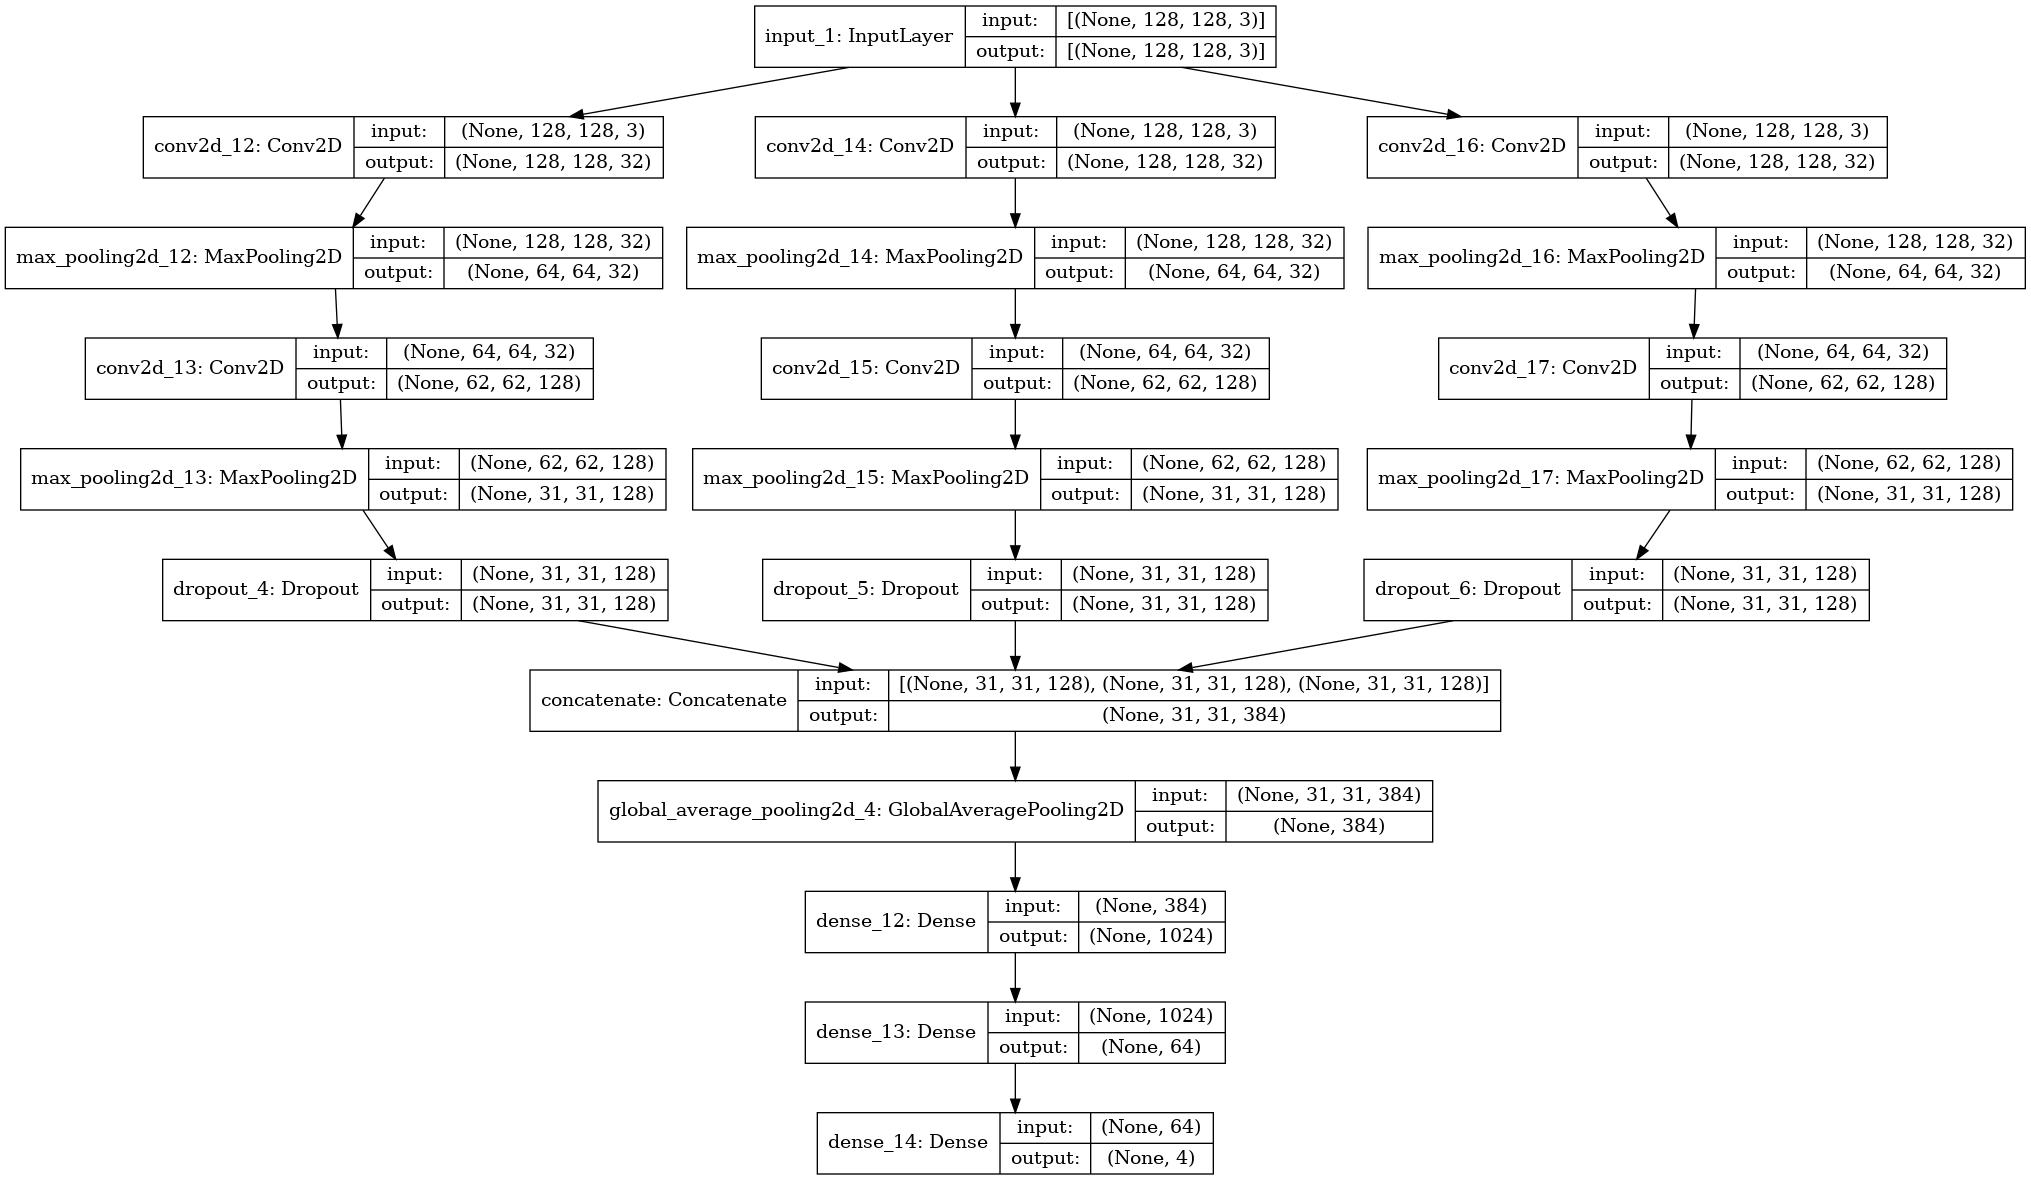

In [36]:
plot_model(inception_model, show_shapes=True, show_layer_names=True)

In [37]:
inception_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [38]:
history_inception = inception_model.fit(
    train_generator,
    steps_per_epoch = train_steps,
    epochs = 50,
    verbose = 1, 
    validation_data = test_generator,
    validation_steps = test_steps
)

Epoch 1/50
125/125 [==============================] - 29s 221ms/step - loss: 3.1818 - accuracy: 0.2582 - val_loss: 1.3696 - val_accuracy: 0.2759
Epoch 2/50
125/125 [==============================] - 21s 170ms/step - loss: 1.4165 - accuracy: 0.2843 - val_loss: 1.4583 - val_accuracy: 0.2492
Epoch 3/50
125/125 [==============================] - 21s 168ms/step - loss: 1.3266 - accuracy: 0.3572 - val_loss: 1.2352 - val_accuracy: 0.4563
Epoch 4/50
125/125 [==============================] - 21s 169ms/step - loss: 1.1623 - accuracy: 0.4795 - val_loss: 1.0762 - val_accuracy: 0.5281
Epoch 5/50
125/125 [==============================] - 21s 167ms/step - loss: 1.0220 - accuracy: 0.5599 - val_loss: 0.9606 - val_accuracy: 0.6065
Epoch 6/50
125/125 [==============================] - 21s 168ms/step - loss: 0.9422 - accuracy: 0.6065 - val_loss: 0.8907 - val_accuracy: 0.6302
Epoch 7/50
125/125 [==============================] - 21s 168ms/step - loss: 0.8749 - accuracy: 0.6385 - val_loss: 0.8532 - val_ac

In [39]:
inception_model.save('Inception_Model‑1')

In [40]:
shutil.make_archive('inception_model_1', 'zip', '/kaggle/working/Inception_Model‑1')

'/kaggle/working/inception_model_1.zip'

***

# **Custom CNN**

In [25]:
cnn_model = keras.models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size = 2),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size = 2),
    
    layers.Conv2D(filters = 128, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size = 2),
    
    layers.Dropout(0.2),
    
    layers.GlobalAveragePooling2D(),
    
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 128)      

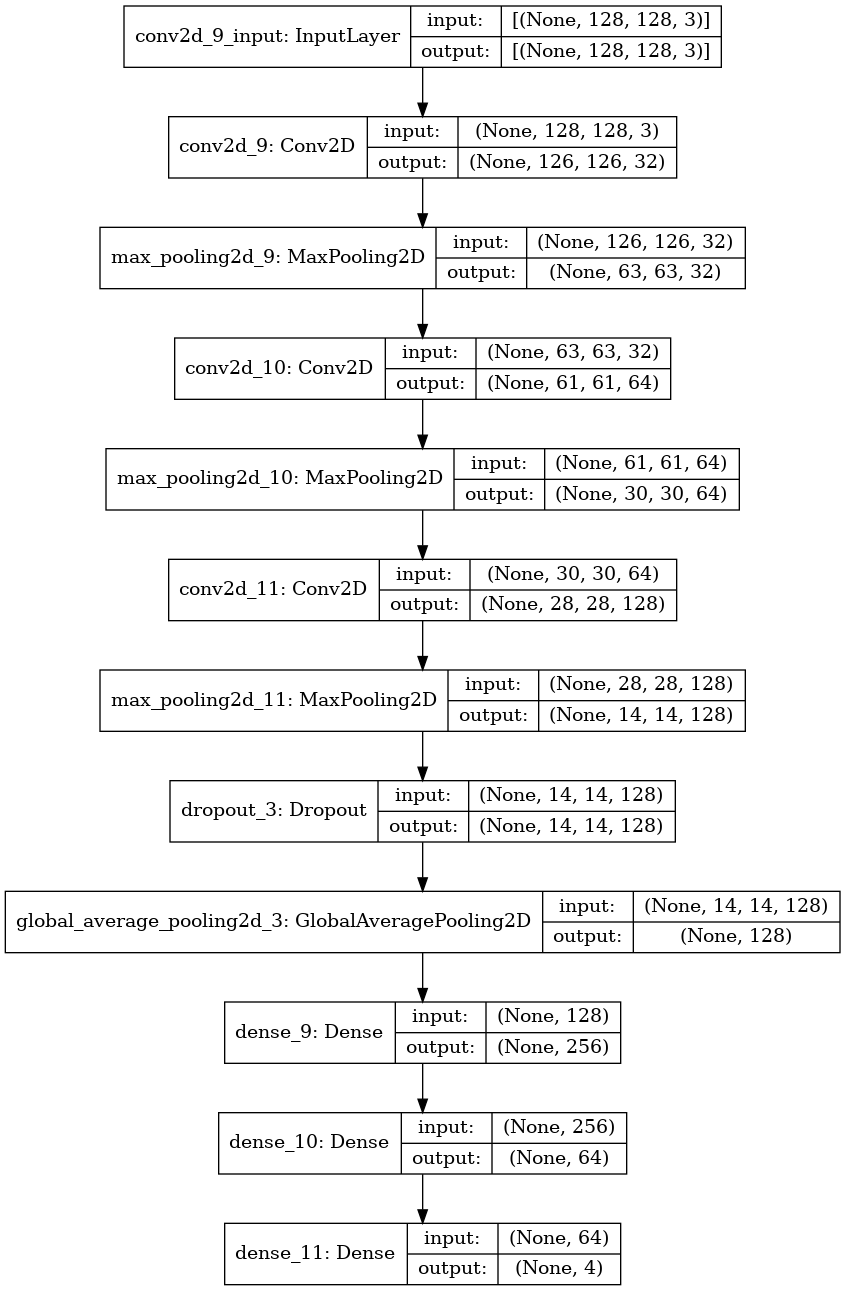

In [26]:
plot_model(cnn_model, show_shapes=True, show_layer_names=True)

In [28]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [29]:
history_cnn = cnn_model.fit(
    train_generator,
    steps_per_epoch = train_steps,
    epochs = 50,
    verbose = 1, 
    validation_data = test_generator,
    validation_steps = test_steps
)

Epoch 1/50
125/125 [==============================] - 20s 156ms/step - loss: 2.1817 - accuracy: 0.2648 - val_loss: 1.3789 - val_accuracy: 0.2503
Epoch 2/50
125/125 [==============================] - 20s 159ms/step - loss: 1.3519 - accuracy: 0.3247 - val_loss: 1.3069 - val_accuracy: 0.3864
Epoch 3/50
125/125 [==============================] - 20s 159ms/step - loss: 1.2229 - accuracy: 0.4265 - val_loss: 1.1257 - val_accuracy: 0.4930
Epoch 4/50
125/125 [==============================] - 19s 155ms/step - loss: 1.1002 - accuracy: 0.4940 - val_loss: 1.1106 - val_accuracy: 0.4538
Epoch 5/50
125/125 [==============================] - 20s 160ms/step - loss: 0.9484 - accuracy: 0.5822 - val_loss: 0.7344 - val_accuracy: 0.6573
Epoch 6/50
125/125 [==============================] - 20s 159ms/step - loss: 0.6324 - accuracy: 0.7284 - val_loss: 0.5125 - val_accuracy: 0.8055
Epoch 7/50
125/125 [==============================] - 21s 167ms/step - loss: 0.4950 - accuracy: 0.7885 - val_loss: 1.1544 - val_ac

In [30]:
cnn_model.save('CNN_Model‑1')

In [33]:
shutil.make_archive('cnn_model_1', 'zip', '/kaggle/working/CNN_Model‑1')

'/kaggle/working/cnn_model_1.zip'

In [3]:
cnn_model_1 = load_model('/kaggle/input/cnn-model-1')

2022-12-04 18:23:07.764613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 18:23:07.902233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 18:23:07.903152: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 18:23:07.905041: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
cnn_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 128)      

In [ ]:
cnn_model_1.predict(validation_data = test_generator)

***

# **ResNet**

In [35]:
base_resnet_model = ResNet50(include_top=False, weights='imagenet')
for layer in base_resnet_model.layers[:140]:
    layer.trainable = False

In [36]:
resnet_model = keras.Sequential()

resnet_model.add(layers.Input(shape = (img_height, img_width, 3)))
resnet_model.add(layers.Lambda(keras.applications.resnet50.preprocess_input))
resnet_model.add(base_resnet_model)

resnet_model.add(layers.GlobalAveragePooling2D())

resnet_model.add(layers.Dense(512, activation='relu')),
resnet_model.add(layers.Dense(64, activation='relu')),
resnet_model.add(layers.Dense(4, activation='softmax'))

resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_6 (Lambda)            (None, 128, 128, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
Total params: 24,669,892
Trainable params: 16,060,228
Non-trainable params: 8,609,664
__________________________________

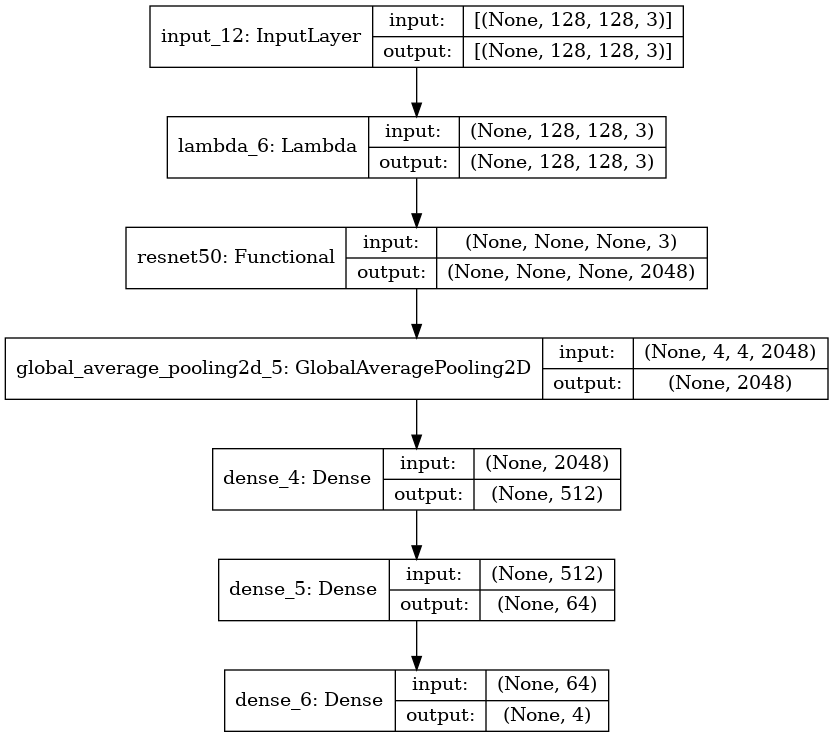

In [37]:
plot_model(resnet_model, show_shapes=True, show_layer_names=True)

In [38]:
resnet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history_resnet = resnet_model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
125/125 [==============================] - 68s 174ms/step - loss: 0.5384 - accuracy: 0.7859 - val_loss: 0.7266 - val_accuracy: 0.8432
Epoch 2/10
125/125 [==============================] - 21s 167ms/step - loss: 0.1832 - accuracy: 0.9335 - val_loss: 0.2459 - val_accuracy: 0.9126
Epoch 3/10
125/125 [==============================] - 21s 168ms/step - loss: 0.0937 - accuracy: 0.9659 - val_loss: 1.0438 - val_accuracy: 0.8342
Epoch 4/10
125/125 [==============================] - 21s 165ms/step - loss: 0.1080 - accuracy: 0.9640 - val_loss: 0.2800 - val_accuracy: 0.9156
Epoch 5/10
125/125 [==============================] - 21s 164ms/step - loss: 0.0488 - accuracy: 0.9836 - val_loss: 0.1692 - val_accuracy: 0.9472
Epoch 6/10
125/125 [==============================] - 21s 167ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.1139 - val_accuracy: 0.9663
Epoch 7/10
125/125 [==============================] - 21s 165ms/step - loss: 0.0153 - accuracy: 0.9935 - val_loss: 0.1992 - val_ac

In [40]:
resnet_model.save('ResNet_Model‑1')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [41]:
shutil.make_archive('resnet_model_1', 'zip', '/kaggle/working/ResNet_Model‑1')

'/kaggle/working/resnet_model_1.zip'